In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, solve_triangular, solve

# Projeto de Sistemas Lineares

![](https://github.com/lacouth/metodos_numericos/blob/master/sistemas_lineares/imagens/falcon.jpg?raw=1)

Parabéns, você foi contratado(a) como estagiário(a) da SpaceX (https://www.spacex.com), e o seu primeiro trabalho é monitorar a velocidade de lançamento do foguete durante o um determinado estágio. 

## O Problema

Apesar de ser uma empresa milionária você só tem um equipamento simples para medir a velocidade, que só faz medição em três instantes de tempo específicos.

No primeiro lançamento você obtém os seguintes dados:

tempo, t | velocidade, v
-----|------
(s)|(m/s)
5|106.8
8|177.2
12|279.2

Você então apresenta para o [Elon Musk](https://pt.wikipedia.org/wiki/Elon_Musk) o gráfico abaixo:


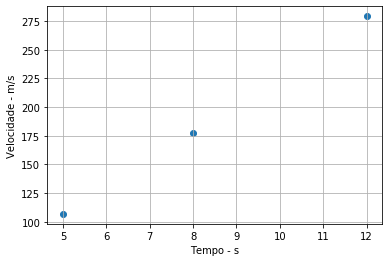

In [0]:
t = [5,8,12]
v = [106.8, 177.2, 279.2]
plt.xlabel('Tempo - s')
plt.ylabel('Velocidade - m/s')
plt.scatter(t,v)
plt.grid(True)

Apesar do bom trabalho Elon pede que você crie uma forma de obter qualquer valor da velocidade entre 5 e 12 segundos.

Utilizando os seus conhecimento de cálculo numérico você resolve aproximar a velocidade por um polinômio de segundo grau:

$$v(t) = at^2 + bt + c$$

O problema passa a ser determinar os valores de $a$,$b$ e $c$. Para resolver isso você escreve o polinômio utilizando os três pontos medidos $(t_1, v_1)$, $(t_2, v_2)$ e $(t_3, v_3)$ resultado em

$$v(t_1) = v_1 = at^2_1 +bt_1 + c$$
$$v(t_2) = v_2 = at^2_2 +bt_2 + c$$
$$v(t_3) = v_3 = at^2_3 +bt_3 + c$$

ou após a substituição dos valores:

$$25a + 5b + c = 106.8$$
$$64a + 8b + c = 177.2$$
$$144a + 12b + c = 279.2$$

Logo você percebe que para determinar os coeficientes do polinômio basta resolver o sistema acima.

## Resolvendo o sistema utilizando Gauss Ingênuo

***No seu projeto você deve fazer a sua própria implementação dos métodos, as funções utilizadas neste template não devem ser utilizadas no seu projeto.*** 

***Este template apresenta apenas a implementação de um método mas no seu projeto você OBRIGATORIAMENTE deve utilizar todos os métodos apresentados na disciplina.***


Inicialmente você decide resolver o sistema utilizando apenas o método de Gauss ingênuo para verificar se a sua premissa está correta.


In [0]:
A1 = np.array([[25,5,1],[64,8,1],[144,12,1]])
b1 = np.array([106.8,177.2,279.2])
coef = solve(A1,b1)
coef

array([ 0.29047619, 19.69047619,  1.08571429])

Você define uma função em Python para testar a sua aproximação polinomial

In [0]:
def polinomio(coeficientes,x):
    return coeficientes[0]*x**2+coeficientes[1]*x+coeficientes[2]

Agora o seu supervisor pode estimar a velocidade do foguete em qualquer instante de tempo entre 5 e 12 segundos. 

In [0]:
t = 6
v = polinomio(coef,t)
print(f'A velocidade no instante t={t}s é de {v} m/s')

A velocidade no instante t=6s é de 129.68571428571428 m/s


Criando o gráfico utilizando mais de três pontos.

Text(0, 0.5, 'Velocidade - m/s')

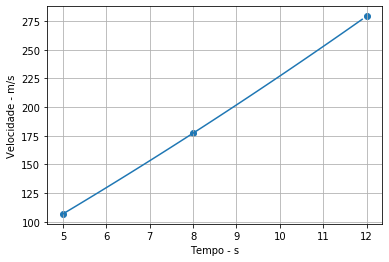

In [0]:
t_gi = np.arange(5,12,0.1)
v_gi = polinomio(coef,t_gi)

t = [5,8,12]
v = [106.8, 177.2, 279.2]

plt.scatter(t,v)
plt.grid(True)

plt.plot(t_gi,v_gi)
plt.grid(True)

plt.xlabel('Tempo - s')
plt.ylabel('Velocidade - m/s')

## Resolvendo o sistema utilizando Gauss com pivotação parcial

***No seu projeto você deve fazer a sua própria dos métodos, as funções utilizadas neste template não devem ser utilizadas no seu projeto.***


Para verificar se é possível melhorar o seu resultado você decide testar com outros métodos


## Resolvendo o sistema utilizando Gauss-Seidel


***No seu projeto você deve fazer a sua própria dos métodos, as funções utilizadas neste template não devem ser utilizadas no seu projeto.***



# Mais trabalho pro estagiário

Muito satisfeito com o trabalho que você apresentou Elon resolve passar mais trabalho para você. Agora você é o responsável por criar os modelos de outros 3 foguetes.

Após as medições iniciais você obtém dados abaixo:

## Foguete 2:

tempo, t | velocidade, v
-----|------
(s)|(m/s)
5|88.2
8|102.8
12|200

## Foguete 3:

tempo, t | velocidade, v
-----|------
(s)|(m/s)
5|122
8|203
12|250

## Foguete 4:

tempo, t | velocidade, v
-----|------
(s)|(m/s)
5|133
8|210.8
12|290


# A Análise

Olhando os dados você percebe que quando você escreve os sistemas de equações que a matriz de coeficientes é a mesma para todos os foguetes, logo você lembra dos ensinamentos da disciplina de Cálculo Numérico e decide resolver os sistemas utilizando **Decomposição LU** 



In [0]:
A = np.array([[25,5,1],[64,8,1],[144,12,1]])
P,L,U = lu(A)

In [0]:
L

array([[1.        , 0.        , 0.        ],
       [0.17361111, 1.        , 0.        ],
       [0.44444444, 0.91428571, 1.        ]])

In [0]:
U

array([[144.        ,  12.        ,   1.        ],
       [  0.        ,   2.91666667,   0.82638889],
       [  0.        ,   0.        ,  -0.2       ]])

In [0]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Segunda parte
Com as matrizes [L][U] e [P] basta resolver os sistemas:

$$[L][Z]=[P][B]$$
$$[U][X]=[Z]$$

### Resolvendo para os dados do foguete #2

* Obtendo [Z]

In [0]:
B2 = np.array([88.2, 102.8, 200])
Z2 = solve_triangular(L,np.dot(B2,P),lower=True)
Z2

array([200.        ,  53.47777778, -34.98285714])

* Obtendo [X]

In [0]:
X2 = solve_triangular(U,Z2)
X2

array([  2.77619048, -31.22380952, 174.91428571])

Text(0, 0.5, 'Velocidade - m/s')

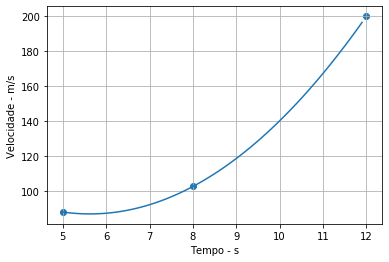

In [0]:
t_f2 = np.arange(5,12,0.1)
v_f2 = polinomio(X2,t_f2)

t = [5,8,12]
v = B2

plt.scatter(t,v)
plt.grid(True)

plt.plot(t_f2,v_f2)
plt.grid(True)

plt.xlabel('Tempo - s')
plt.ylabel('Velocidade - m/s')

### Resolvendo para os dados do foguete #3

* Obtendo [Z]

In [0]:
B3 = np.array([122, 203, 250])
Z3 = solve_triangular(L,np.dot(B3,P),lower=True)
Z3

array([250.        ,  78.59722222,  20.02857143])

* Obtendo [X]

In [0]:
X3 = solve_triangular(U,Z3)
X3

array([  -2.17857143,   55.32142857, -100.14285714])

Text(0, 0.5, 'Velocidade - m/s')

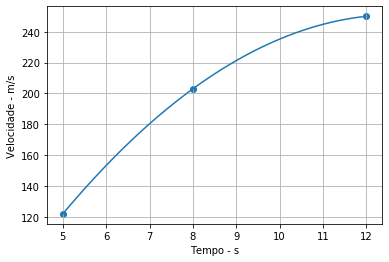

In [0]:
t_f3 = np.arange(5,12,0.1)
v_f3 = polinomio(X3,t_f3)

t = [5,8,12]
v = B3

plt.scatter(t,v)
plt.grid(True)

plt.plot(t_f3,v_f3)
plt.grid(True)

plt.xlabel('Tempo - s')
plt.ylabel('Velocidade - m/s')

### Resolvendo para os dados do foguete #4

* Obtendo [Z]

In [0]:
B4 = np.array([133, 260.8, 290])
Z4 = solve_triangular(L,np.dot(B4,P),lower=True)
Z4

array([290.        ,  82.65277778,  56.34285714])

* Obtendo [X]

In [0]:
X4 = solve_triangular(U,Z4)
X4

array([  -5.04285714,  108.15714286, -281.71428571])

Text(0, 0.5, 'Velocidade - m/s')

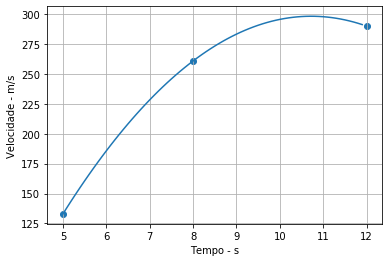

In [0]:
t_f4 = np.arange(5,12,0.1)
v_f4 = polinomio(X4,t_f4)

t = [5,8,12]
v = B4

plt.scatter(t,v)
plt.grid(True)

plt.plot(t_f4,v_f4)
plt.grid(True)

plt.xlabel('Tempo - s')
plt.ylabel('Velocidade - m/s')

## Sistema para comparar as velocidades dos foguetes

Com os cálculos realizados, é possível montar um pequeno sistema de estimativa de velocidade dos foguetes.

In [0]:
tempo = int(input("Informe o instante de tempo desejado 5<t<12: "))

Informe o instante de tempo desejado 5<t<12: 9


In [0]:
foguete_1 = polinomio(coef, tempo)
foguete_2 = polinomio(X2,tempo)
foguete_3 = polinomio(X3,tempo)
foguete_4 = polinomio(X4,tempo)

In [0]:
print(f'No instante de tempo {tempo}s ')
print(f'As velocidades dos 4 foguetes foram, respectivamente:')
print(f'{foguete_1} m/s, {foguete_2} m/s, {foguete_3} m/s, {foguete_4} m/s, ')

No instante de tempo 9s 
As velocidades dos 4 foguetes foram, respectivamente:
201.82857142857145 m/s, 118.77142857142857 m/s, 221.28571428571433 m/s, 283.2285714285714 m/s, 


# Conclusão

Na conclusão você deve contextualizar os resultados obtidos enfatizando as comparações entre os métodos e justificando o resultados obtidos de cada um.